In [1]:
import json
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

In [2]:
save_results = True

In [3]:
with open('results/ER/results_ER.json', 'r') as json_file:
    results = json.load(json_file)
    N = results['N']
    nruns = results['nruns']
    crange = np.linspace(*results['crange'])
    results = results['results']

In [4]:
N

100000

In [9]:
n_ap = []
gcc_size = []
for result in results:
    n_ap_loc = sum(run['cascade'][0]['n_ap'] for run in result['runs'])
    gcc_size_loc = sum(run['cascade'][0]['gcc_size'] for run in result['runs'])
    n_ap.append(n_ap_loc / N / nruns)
    gcc_size.append(gcc_size_loc / N / nruns)

In [10]:
lw, ms = 1, 3

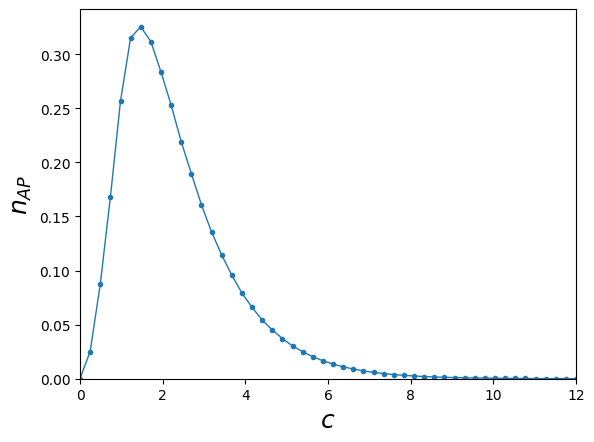

In [11]:
plt.plot(crange, n_ap, 'o-', lw=lw, ms=ms, color='tab:blue', label='$t = 0$')
plt.xlim(0, 12)
plt.ylim(bottom=0)
plt.xlabel('$c$', fontdict={'size': 18})
plt.ylabel('$n_{AP}$', fontdict={'size': 18})
if save_results:
    plt.savefig(f'results/ER_no_cascade/AP.png')

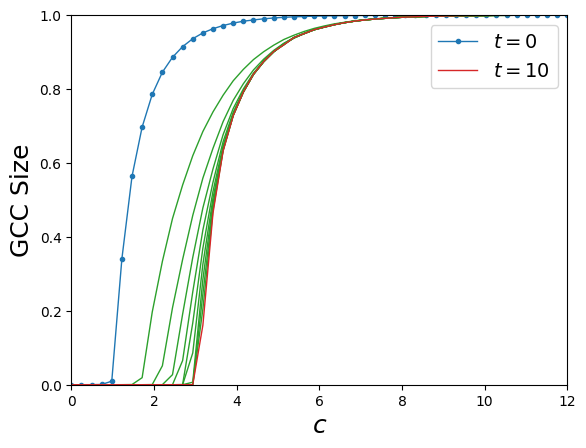

In [30]:
plt.plot(crange, gcc_size[0], 'o-', lw=lw, ms=ms, color='tab:blue', label='$t = 0$')
# for t in range(1, max_t_for_plots + 1):
for t in range(1, max_t_for_plots):
    plt.plot(crange, gcc_size[t], '-', lw=lw, ms=ms, color='tab:green')
# plt.plot(crange, gcc_inf, 'o-', lw=lw, ms=ms, color='tab:red', label='$t = \infty$')
plt.plot(crange, gcc_size[max_t_for_plots], '-', lw=lw, ms=ms, color='tab:red', label=f'$t = {max_t_for_plots}$')
plt.xlim(0, 12)
plt.ylim(0, 1)
plt.xlabel('$c$', fontdict={'size': 18})
plt.ylabel('GCC Size', fontdict={'size': 18})
plt.legend(fontsize=14)
if save_results:
    plt.savefig(f'results/ER/GCC_size.png')

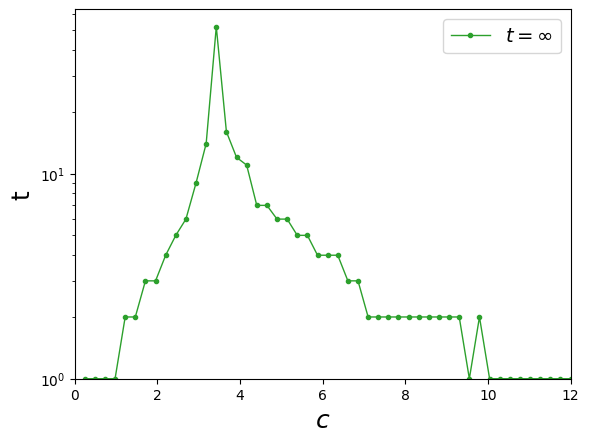

In [31]:
plt.semilogy(crange, np.rint(T), 'o-', ms=ms, lw=lw, color='tab:green', label='$t = \infty$')
plt.xlim(0, 12)
plt.ylim(bottom=1)
plt.xlabel('$c$', fontdict={'size': 18})
plt.ylabel('t', fontdict={'size': 18})
plt.legend(fontsize=14)
if save_results:
    plt.savefig(f'results/ER/t.png')